# Forecasting

## Loading Libraries and datasets

In [78]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
#from matplotlib import pyplot as plt

In [79]:
# importing pyplot from matplotlib as plt
# for plotting graphs
#import matplotlib.pyplot as plt
#plt.style.use('default')
#%matplotlib inline

In [80]:
#Data
df = pd.read_csv('../competitive-data-science-final-project/cleaned_train.csv')

In [81]:
df.head()

,date,date_block_num,shop_id,item_id,item_cnt_day,Month,Year,DayofWeek,item_category_id,Holiday
0,2013-01-01,0,2,991,1.0,1,2013,1,67,True
1,2013-01-01,0,2,1472,1.0,1,2013,1,23,True
2,2013-01-01,0,2,1905,1.0,1,2013,1,30,True
3,2013-01-01,0,2,2920,2.0,1,2013,1,21,True
4,2013-01-01,0,2,3320,1.0,1,2013,1,19,True


In [82]:
df.tail()

,date,date_block_num,shop_id,item_id,item_cnt_day,Month,Year,DayofWeek,item_category_id,Holiday
2935816,2015-10-31,33,59,20730,1.0,10,2015,5,72,False
2935817,2015-10-31,33,59,20866,1.0,10,2015,5,72,False
2935818,2015-10-31,33,59,20949,1.0,10,2015,5,71,False
2935819,2015-10-31,33,59,21369,1.0,10,2015,5,40,False
2935820,2015-10-31,33,59,21449,1.0,10,2015,5,40,False


### 1. 3- day Moving average - Grouped by date

In [147]:
#Reference: https://machinelearningmastery.com/moving-average-smoothing-for-time-series-forecasting-python/

In [148]:
df_daily = df.groupby(df.date)[["item_cnt_day"]].sum()
df_daily.tail()

,item_cnt_day
date,
2015-10-27,1551.0
2015-10-28,3593.0
2015-10-29,1589.0
2015-10-30,2274.0
2015-10-31,3104.0


In [149]:
series = df_daily
series.tail()

,item_cnt_day
date,
2015-10-27,1551.0
2015-10-28,3593.0
2015-10-29,1589.0
2015-10-30,2274.0
2015-10-31,3104.0


In [150]:
# prepare situation
X = series.values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()

In [151]:
# walk forward over time steps in test
for t in range(len(test)):
 length = len(history)
 yhat = mean([history[i] for i in range(length-window,length)])
 obs = test[t]
 predictions.append(yhat)
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=5857.000000, expected=6617.000000
predicted=7412.333333, expected=6345.000000
predicted=6794.666667, expected=5858.000000
predicted=6273.333333, expected=4984.000000
predicted=5729.000000, expected=4772.000000
predicted=5204.666667, expected=3162.000000
predicted=4306.000000, expected=3142.000000
predicted=3692.000000, expected=3829.000000
predicted=3377.666667, expected=5443.000000
predicted=4138.000000, expected=4475.000000
predicted=4582.333333, expected=2595.000000
predicted=4171.000000, expected=3137.000000
predicted=3402.333333, expected=3033.000000
predicted=2921.666667, expected=3096.000000
predicted=3088.666667, expected=3682.000000
predicted=3270.333333, expected=6044.000000
predicted=4274.000000, expected=5111.000000
predicted=4945.666667, expected=2636.000000
predicted=4597.000000, expected=2775.000000
predicted=3507.333333, expected=2727.000000
predicted=2712.666667, expected=3016.000000
predicted=2839.333333, expected=4244.000000
predicted=3329.000000, expected=

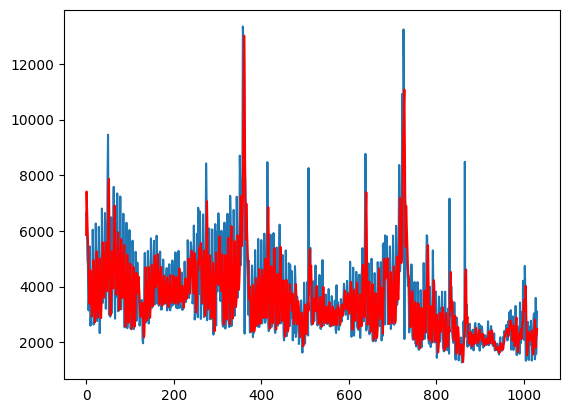

In [152]:
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [156]:
np.count_nonzero(predictions[-61:-31])
np.count_nonzero(X[-61:-31])

30

In [157]:
np.count_nonzero(predictions[-31:])
np.count_nonzero(X[-31:])

31

In [158]:
print("Predicted month 32 (Sept): " , np.sum(predictions[-61:-31]))
print("Actual month 32 (Sept): " , np.sum(X[-61:-31]))
print("\nPredicted month 33 (Oct): " , np.sum(predictions[-31:]))
print("Actual month 33 (Oct): " , np.sum(X[-31:]))

Predicted month 32 (Sept):  70302.0
Actual month 32 (Sept):  72843.0

Predicted month 33 (Oct):  73538.66666666666
Actual month 33 (Oct):  71056.0


In [161]:
#Mean Squared Error
print('Test MSE: %.3f' % error)

Test MSE: 1973215.233
